In [64]:
from recsys.algorithm.factorize import SVD
from recsys.datamodel.data import Data
from game import Game, get_preference

import json
import urllib
import urllib2
import math
import cStringIO
import matplotlib.pyplot as plt
from game import Game, get_preference
from user import get_user_list
from operator import itemgetter, attrgetter, methodcaller

In [69]:
given_user="76561197960265731"
#given_user="76561197960271661"

In [33]:
#get and test gamelist
url = "http://api.steampowered.com/ISteamApps/GetAppList/v2"
response = urllib2.urlopen(url)
gameList = json.loads(response.read().decode('utf-8-sig'))
found=0
num=0
for item in gameList['applist']['apps']:
    if item['appid']==110:
        print (item['name'])
        found=1
    num=num+1

if found!=1:
    print("No Game Found")

#generate list of users
url='http://api.steampowered.com/ISteamUser/GetFriendList/v0001/?\
key=147CBF377C6B648EC3DC73499CE73D32&steamid=76561197960435530&relationship=friend'
response = urllib2.urlopen(url)
friends_Data = json.loads(response.read().decode('utf-8-sig'))
user_List=[]
user_List.append('76561198119879419')
num=0
for friends in friends_Data['friendslist']['friends']:
    user_List.append(friends['steamid'])   
    num=num+1

user_List.append('')

preference_dict={}
user_map={}
id_map={}
data = Data() #saving rating data
i=1
for user in user_List:
    user_id=(str(user))
    url = "http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?\
key=147CBF377C6B648EC3DC73499CE73D32&steamid="+user+"&format=json"
    response = urllib2.urlopen(url)
    owned_gameData = json.loads(response.read().decode('utf-8-sig'))
    user_Pref={}
    #print (user)
    try: 
        if owned_gameData['response']['game_count']!=0:
            user_Pref={}
            for games in owned_gameData['response']['games']:
                if games['playtime_forever']>0:
                    user_Pref[games['appid']]= math.log(games['playtime_forever'])
                    data.add_tuple((math.log(games['playtime_forever'], 10), games['appid'], i))
                    user_map[i]=user
                    id_map[user]=i
    except:
        continue
    i=i+1
    #preference_dict[user]=user_Pref
data.save('rating.dat')

svd = SVD()
svd.load_data(filename='rating.dat',
            sep='\t',
            format={'col':2, 'row':1, 'value':0, 'ids': int})

k = 100
svd.compute(k=k, min_values=1, pre_normalize=None, mean_center=True, post_normalize=True)

svd_r = SVD()
svd_r.load_data(filename='rating.dat',
            sep='\t',
            format={'col':1, 'row':2, 'value':0, 'ids': int})

k = 100
svd_r.compute(k=k, min_values=1, pre_normalize=None, mean_center=True, post_normalize=True)

No Game Found


In [86]:
for item in svd_r.similar(170):
    print item

(170, 1.0000000000000002)
(225, 0.7465125529483968)
(60, 0.46764789064813284)
(178, 0.43847096923955026)
(210, 0.41984535792841543)
(23, 0.40415599760736054)
(4, 0.40055378051316326)
(212, 0.38198776554571845)
(70, 0.37559901715984773)
(6, 0.35242531640637575)


In [85]:
svd_r.similar(225)

[(225, 0.99999999999999989),
 (170, 0.7465125529483968),
 (86, 0.66807218135328705),
 (70, 0.6504555681224865),
 (167, 0.58515933421202126),
 (178, 0.57037645096756973),
 (6, 0.56251347725171796),
 (47, 0.56070932555719299),
 (210, 0.5384070526932957),
 (212, 0.51491253207428134)]

In [76]:
for item in svd.recommend(index, is_row=False):
    print item

(72850, 4.4049802603875285)
(247120, 4.2471178724395315)
(20590, 4.1661666667949628)
(29500, 4.1461788099132626)
(271590, 4.1341200751952876)
(8930, 3.9479809793256804)
(323370, 3.8285401962386478)
(287680, 3.7862585732822795)
(15160, 3.6454713220134423)
(17420, 3.6388940105009402)


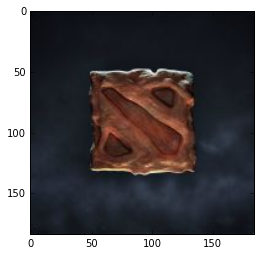

EJ
76561197960265731


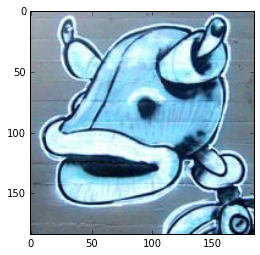

Gregori
76561197960265738


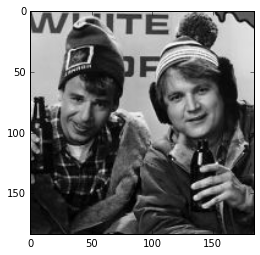

TheTCBKing
76561198009095613


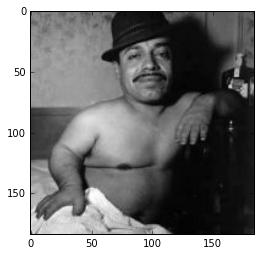

Spanker
76561197964115159


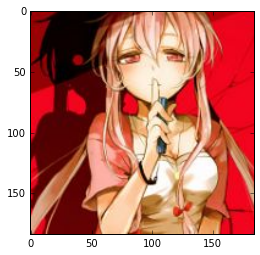

@LuminousInverse
76561198042468117


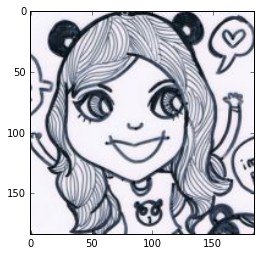

@dpmlicious
76561198031319803


In [75]:
index=id_map[given_user]
for item in svd_r.similar(index):
    if item[1]>0.2:
        url='http://api.steampowered.com/ISteamUser/GetPlayerSummaries/v0002/?\
key=147CBF377C6B648EC3DC73499CE73D32&steamids='+user_map[item[0]]
        response = urllib2.urlopen(url)
        friends_Data = json.loads(response.read().decode('utf-8-sig'))
        #print avatar
        urllib.urlretrieve(friends_Data['response']['players'][0]['avatarfull'], "local.jpg")
        image = plt.imread("local.jpg")
        plt.imshow(image)
        plt.show()
        
        #print name
        print friends_Data['response']['players'][0]["personaname"]
        print user_map[item[0]]

Games Recommended:


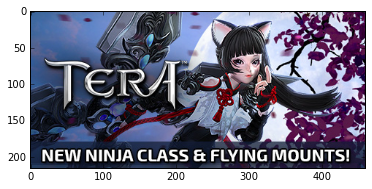

TERA


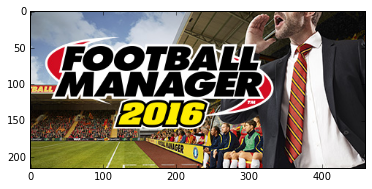

Football Manager 2016


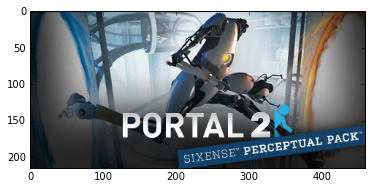

Portal 2 Sixense Perceptual Pack


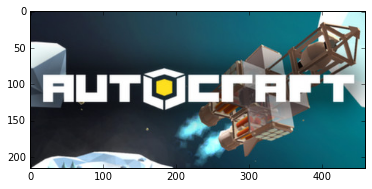

Autocraft


In [90]:
#show the result
game_recdict={}
for item in svd.recommend(225, is_row=False):
    appid=item[0]
    game=Game(appid)
    if (game.success==1):
        game_recdict[game.rec]=[game.appid, game.genre, game.name, game.img]
    #print item
        
sorted_list=sorted(game_recdict.keys(), reverse=True)
print ("Games Recommended:")
for i in sorted_list:
    # image
    urllib.urlretrieve(game_recdict[i][3], "local-filename.jpg")
    image = plt.imread("local-filename.jpg")
    plt.imshow(image)
    plt.show()
    
        #name
    print game_recdict[i][2]


# preference_dict